## Statistical tests

Outline for today's concept session:
1. Basic idea of statistical tests (and their need).
2. Simple statistical test (one sample and two sample t-tests).




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set(color_codes=True)
%matplotlib inline

## Recap of previous classes

### Coin toss (Binomial distribution)

Let's say we toss a coin 10 times. The result can be plotted as a frequency distribution:


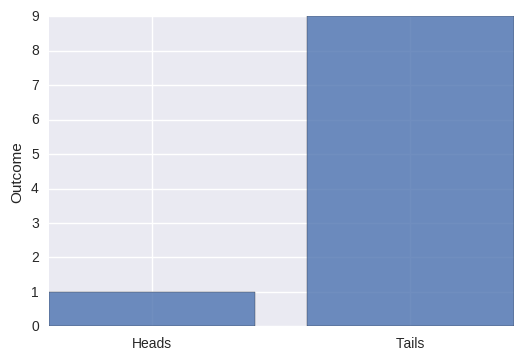

In [14]:
num = 10
flips = np.random.choice([0,1], num, [0.5, 0.5])

# Plot them beautifully
n_Tails = sum(flips)
n_Heads = num - n_Tails
events = ('Heads', 'Tails')
e_pos = np.arange(len(events))
outcome = [n_Heads, n_Tails]
plt.bar(e_pos, outcome, align='center', alpha=0.8)
plt.xticks(e_pos, events)
plt.ylabel('Outcome')


Let's call the tossing of the coin 10 times as an experiment. For every experiment, let's calculate the ratio of the number of heads to the total coin tosses. This is our output from the experiment. 

We can now perform this experiment multiple times (say 100) and plot the distribution of our output. How do you think this distribution would look like (hint: central limit theorem).


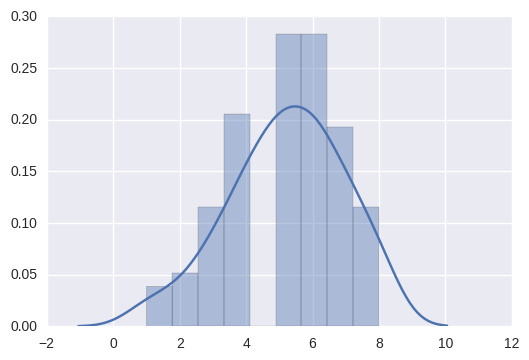

In [19]:
output = []
num_flips = 10
num_experiments = 100

for i in range(num_experiments):
    flips = np.random.choice([0,1], num_flips, [0.5, 0.5])
    output.append(sum(flips))
    
sns.distplot(output)


As long as we take some average measure in our experiment, each of which is generated by independent identical distributions, we are bound to get a Gaussian (normal) distribution. This was the central limit theorem we discussed in the last concept session.

This is what makes the Gaussian distribution so frequent in its occurence. 


## Problem statement

You have one coins on which you have performed the above experiment multiple times and confirmed that it is indeed unbiased. I take the coin from you and perform a 'treatment' on it before returning it back to you.

Is the 'treated' coin different from the original one? That is, is the treated coin more biased towards heads or tails?

How would you answer this?

There are multiple ways of going about this:

a. Compare means/medians/modes and say that they are different between the original and the treated coin. There is a problem with this method though. What is it?

    Problem: *At what difference would you call the original and treated coin different from each other?*

b. Similarly, we can compare variance, std etc and use it to show that they are different from each other.

This again faces the same problem. Differences, in our experiment and otherwise, arise due to two reasons:
1. Differences in underlying probabilities (biasness of coins in our case).
2. *Sampling method.*

Just by the act of sampling it, we are bound to get differences as we saw with the coin tosses above. How do we resolve this?

## Normality assumption

One easy way of solving this is assume normality of the distribution (reasonable assumption for most cases).

*Parametric* tests assume that all our sample distributions (control, treated in our case), are Gaussian distributions.

The Gaussian distribution provides us with a very nice way of measuring the probability of differences. Here is how:

To make things easy, let's first normalize our distribution  $$\mathscr{N}(\mu,\sigma)$$  to $\mathscr{N}(0,1)$. Such a distribution is called the Z distribution or the *Standard Normal* distribution. Here is an example:

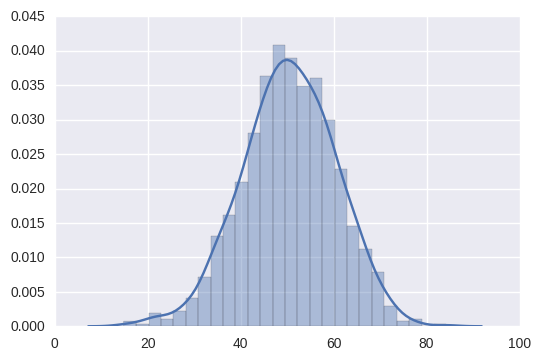

In [20]:
out_mean = 50
out_std = 10
output = out_mean + out_std * np.random.randn(1000)
sns.distplot(output)

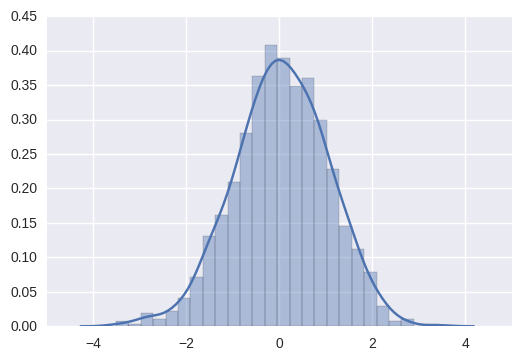

In [21]:
z_output = (output - out_mean)/out_std
sns.distplot(z_output)

### Z (Standard Normal) distribution

The Z distribution has a bunch of convienent properties which makes quantifying differences easy.

![Standard Normal Distribution](figures/normal-distribution-large.svg)


We can use the Z distribution to quantify the differences between the original and the treated coin. Let us state our Null ($H_0$) hypothesis and alternate hypothesis ($H_A$):

$H_0$: The treated coin is the same as the original coin ($\mu = 0.5$).

$H_A$: The treated coin is more biased than the original coin ($\mu \neq 0.5$)


How should we go about falsifying the null hypothesis?

Steps to quantify differences between original and treated coin:
1. We know that the mean of the original coins = 0.5. We also know the expected variance of the the original coin distribution.
2. To quantify the differences, we can obtain the treated coin distribution, convert it to a Z distribution. 
3. We scale the treated coin mean using the same scaling factor as the original coin distribution. The treated coin mean now can be plotted along with the Z distribution.
4. The difference in means can now be converted to probability - the probability of obtaining a $\mu \neq 0.5$ which can be computed from the Z distribution.

Let's try this out from an example.


## Z distribution intuition

Let's use this for our baseline:
![Standard Normal Distribution](figures/normal-distribution-large.svg)

Now, what is the probability that the any sampled mean is 
- greater than 0?
- less than 0?
- greater than 1 std away?
- less than 1 std away?
- greater than 2 std away?
- greater than 3 std away?

In [6]:
# greater than 0?
p1 = 1 - stats.norm.cdf(0)
# less than 0?
p2 = stats.norm.cdf(0)
# greater than 1 std away?
p3 = 2*stats.norm.cdf(-1)
# less than 1 std away?
p4 = stats.norm.cdf(1)-stats.norm.cdf(-1)
# greater than 2 std away?
p5 = 2*stats.norm.cdf(-2)
# greater than 3 std away?
p6 = 2*stats.norm.cdf(-3)

# Print results
print('greater than 0 = %0.4f'%p1)
print('less than 0 = %0.4f'%p2)
print('greater than 1 std away = %0.4f'%p3)
print('less than 1 std away = %0.4f'%p4)
print('greater than 2 std away = %0.4f'%p5)
print('greater than 3 std away = %0.4f'%p6)

greater than 0 = 0.5000
less than 0 = 0.5000
greater than 1 std away = 0.3173
less than 1 std away = 0.6827
greater than 2 std away = 0.0455
greater than 3 std away = 0.0027


Now, how do we use this to falsify our null hypothesis?

p(mean>$\mu$) = area of the z distribution > $\mu$;

p(mean<$\mu$) = area of the z distribution < $\mu$;

[6, 3, 4, 4, 5, 3, 6, 6, 2, 8, 4, 6, 6, 6, 4, 7, 7, 4, 3, 3, 4, 10, 3, 5, 7, 5, 5, 2, 4, 3, 6, 5, 5, 5, 4, 5, 2, 5, 7, 5, 7, 5, 5, 8, 5, 7, 4, 5, 6, 2, 4, 6, 4, 4, 3, 3, 7, 5, 8, 5, 5, 4, 5, 2, 4, 4, 5, 4, 8, 3, 3, 6, 3, 5, 5, 9, 4, 3, 5, 3, 7, 7, 6, 3, 4, 6, 7, 5, 5, 5, 5, 5, 5, 5, 5, 8, 4, 5, 4, 5]
[5, 5, 6, 5, 7, 5, 4, 6, 4, 5, 7, 5, 3, 3, 3, 6, 6, 5, 5, 7, 3, 5, 7, 6, 8, 6, 6, 3, 6, 4, 5, 5, 7, 3, 6, 4, 5, 6, 5, 5, 3, 4, 4, 6, 6, 6, 6, 6, 5, 6, 4, 7, 5, 6, 5, 3, 3, 7, 5, 8, 6, 4, 4, 8, 4, 6, 3, 2, 6, 7, 7, 4, 7, 5, 4, 6, 2, 3, 7, 6, 4, 4, 5, 3, 7, 9, 3, 5, 4, 6, 7, 8, 6, 7, 6, 3, 4, 8, 5, 7]


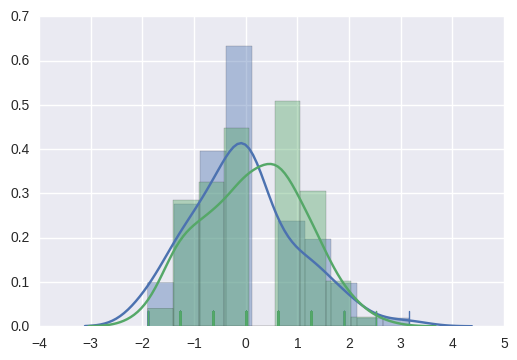

In [7]:
output_original = []
output_treated = []
num_flips = 10
num_experiments = 100

for i in range(num_experiments):
    flips_original = np.random.choice([0,1], num_flips, [0.5, 0.5])
    flips_treated = np.random.choice([0,1], num_flips, [0.8, 0.2])
    output_original.append(sum(flips_original))
    output_treated.append(sum(flips_treated))
    
out_exp_mean = num_flips * 0.5
out_exp_std = (num_flips * 0.5 * 0.5)**0.5
out_org_z = [(out_org - out_exp_mean)/out_exp_std for out_org in output_original]
out_trt_z = [(out_trt - out_exp_mean)/out_exp_std for out_trt in output_treated]
 
sns.distplot(out_org_z,rug=True)
sns.distplot(out_trt_z,rug=True)

print(output_original)
print(output_treated)


In [26]:
(0.95)**4


0.8145062499999999

In [ ]:
log(0)

In [25]:
stats.norm.ppf(0.975)

1.959963984540054

In [8]:
stats.norm.pdf(2)

0.053990966513188063

In [9]:
stats.norm.ppf(0.5)

0.0

In [10]:
stats.norm.cdf(0)

0.5